In [2]:
# Install required packages
!pip install xgboost -q

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import zipfile
import os



In [4]:
# Load the dataset
df = pd.read_csv("retail_price.csv")

# Preview the first few rows
print("✅ Dataset loaded successfully!")
df.head()


✅ Dataset loaded successfully!


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [5]:
# Check basic info
df.info()

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Basic statistics
print("\nDescriptive Statistics:")
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [8]:
# Step 4: Feature selection
# We'll predict 'unit_price' based on all other numeric columns

# Drop target column from features
X = df.drop(columns=['unit_price'])
y = df['unit_price']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split complete!")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Data split complete!
Training samples: 540
Testing samples: 136


In [10]:

X = df.select_dtypes(include=['number']).drop(columns=['unit_price'])
y = df['unit_price']

# Split again after cleaning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Cleaned and re-split data (numeric only):")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])
print("Features used:", list(X.columns))


✅ Cleaned and re-split data (numeric only):
Training samples: 540
Testing samples: 136
Features used: ['qty', 'total_price', 'freight_price', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month', 'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3', 'lag_price']


In [12]:


# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# XGBoost Regressor
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate both models
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.3f}")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("XGBoost Regressor", y_test, y_pred_xgb)



Linear Regression Performance:
MAE: 4.36
MSE: 65.58
R²: 0.988

XGBoost Regressor Performance:
MAE: 3.36
MSE: 43.03
R²: 0.992


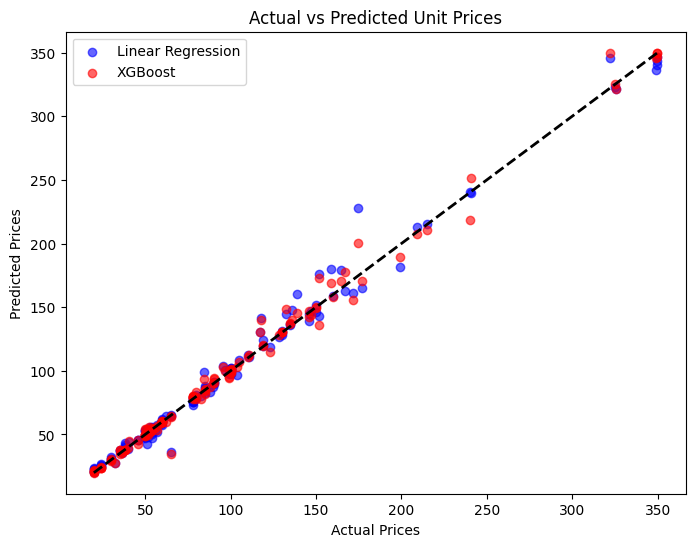

In [13]:
# Step 6: Visualization of Predictions

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression', alpha=0.6)
plt.scatter(y_test, y_pred_xgb, color='red', label='XGBoost', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Unit Prices")
plt.legend()
plt.show()


In [14]:
# Step 7: Save trained models
import joblib

# Save both models
joblib.dump(lr, "linear_regression_model.pkl")
joblib.dump(xgb, "xgboost_model.pkl")

print("✅ Models saved successfully!")


✅ Models saved successfully!
